## Creating an Initial Population

Now we can create an initial population, by first defining the population size and then selecting from the list of recipes.




In [3721]:
import json
import pprint
import random
import math
from collections import defaultdict
import copy
import pandas as pd
import statistics as stat
from sugarcube import Mass, Volume, Liquids, Butter, Sugar, Flour, Pastes, Solids, Powder, Bindings, Yeast, Salt, Icecream, Jam, Biscuits, Nori, Beans

In [3722]:
categories = {
    "Liquids": ["milk", "almond milk", "coconut", "water", "oil", "juice", "extract", "essence"],
    "Butter": ["butter", "nutella", "peanut butter", "spread"],
    "Sugar": ["sugar"],
    "Flour": ["flour", "starch", "cornstarch", "mochiko"],
    "Pastes": ["paste", "cream"],
    "Solids": ["fruit", "nuts", "chocolate", "raspberries", "strawberries", "banana", "mango", "potato", "corn"],
    "Powder": ["matcha", "powder", "spice"],
    "Bindings": ["egg", "mashed", "applesauce", "puree"],
    "Yeast": ["yeast"],
    "Salt": ["salt"],
    "Icecream": ["ice"],
    "Jam": ["jam", "pudding"],
    "Biscuits": ["biscuits"],
    "Nori": ["nori"],
    "Beans": ["beans"]
}

In [3723]:
# random ingredient to add to the code 

other_ingredients = [
    {'amount': 30.0, 'ingredient': 'pickle', 'rating': 4.3, 'unit': 'g', 'category': 'Solids'},
    {'amount': 100.0, 'ingredient': 'dutch cheese', 'rating': 3.7, 'unit': 'g', 'category': 'Solids'},
    {'amount': 100.0, 'ingredient': 'cooked red beet', 'rating': 3.2, 'unit': 'g', 'category': 'Solids'},
    {'amount': 150.0, 'ingredient': 'broccoli', 'rating': 2.8, 'unit': 'g', 'category': 'Solids'},
    {'amount': 150.0, 'ingredient': 'carrot', 'rating': 3.0, 'unit': 'g', 'category': 'Solids'},
    {'amount': 200.0, 'ingredient': 'feta', 'rating': 4.0, 'unit': 'g', 'category': 'Solids'},
    {'amount': 30.0, 'ingredient': 'amsterdam onions', 'rating': 2.7, 'unit': 'g', 'category': 'Solids'},
    {'amount': 6.0, 'ingredient': 'pancake syrup', 'rating': 4.2, 'unit': 'g', 'category': 'Pastes'},
    {'amount': 70.0, 'ingredient': 'coconut snippers', 'rating': 4.2, 'unit': 'g', 'category': 'Biscuits'},
    {'amount': 15.0, 'ingredient': 'cinnamon', 'rating': 5.0, 'unit': 'g', 'category': 'Powder'},
    {'amount': 20.0, 'ingredient': 'lime juice', 'rating': 3.7, 'unit': 'ml', 'category': 'Liquids'},
    {'amount': 150.0, 'ingredient': 'lychee', 'rating': 4.0, 'unit': 'g', 'category': 'Solids'},
    {'amount': 20.0, 'ingredient': 'mocha/coffee', 'rating': 5.0, 'unit': 'g', 'category': 'Powder'},
    {'amount': 200.0, 'ingredient': 'raspberry', 'rating': 4.5, 'unit': 'g', 'category': 'Solids'},
    {'amount': 180.0, 'ingredient': 'pineapple', 'rating': 4.2, 'unit': 'g', 'category': 'Solids'},
    {'amount': 180.0, 'ingredient': 'watermelon', 'rating': 3.7, 'unit': 'g', 'category': 'Solids'},
    {'amount': 40.0, 'ingredient': 'caramalised red onion', 'rating': 2.0, 'unit': 'g', 'category': 'Solids'},
    {'amount': 150.0, 'ingredient': 'eggplant', 'rating': 3.3, 'unit': 'g', 'category': 'Solids'},
    {'amount': 2.0, 'ingredient': 'fresh ginger', 'rating': 4.7, 'unit': 'g', 'category': 'Solids'},
    {'amount': 250.0, 'ingredient': 'avocado', 'rating': 3.5, 'unit': 'g', 'category': 'Solids'},
    {'amount': 15.0, 'ingredient': 'honey', 'rating': 4.7, 'unit': 'ml', 'category': 'Pastes'},
    {'amount': 50.0, 'ingredient': 'poppy seeds', 'rating': 4.3, 'unit': 'g', 'category': 'Nori'},
    {'amount': 50.0, 'ingredient': 'sweet chili sauce', 'rating': 3.3, 'unit': 'ml', 'category': 'Liquids'},
    {'amount': 100.0, 'ingredient': 'olives', 'rating': 4.0, 'unit': 'g', 'category': 'Solids'},
    {'amount': 200.0, 'ingredient': 'chickpeas', 'rating': 3.0, 'unit': 'g', 'category': 'Solids'},
    {'amount': 40.0, 'ingredient': 'soy sauce', 'rating': 3.7, 'unit': 'ml', 'category': 'Liquids'},
    {'amount': 2.0, 'ingredient': 'basil', 'rating': 4.0, 'unit': 'g', 'category': 'Nori'},
    {'amount': 5.0, 'ingredient': 'miso', 'rating': 4.2, 'unit': 'g', 'category': 'Pastes'},
    {'amount': 10.0, 'ingredient': 'teriyaki', 'rating': 3.8, 'unit': 'ml', 'category': 'Liquids'},
]


In [3724]:
with open('data/mochi.json', 'r') as file:
    data = json.load(file)
recipes = data['recipes']

So here we give each ingredient the rating of its recipe.
If an ingredient is used in multiple recipes, we'll take the mean of all the ratings for this ingredient.

In [3725]:
all_ingredients = []
for i, recipe in enumerate(recipes):
  all_ingredients.extend(recipe['ingredients'])
pprint.PrettyPrinter(width=150).pprint(all_ingredients)

[{'amount': 283.5, 'category': 'Solids', 'ingredient': 'fresh strawberries', 'rating': 4.71, 'unit': 'g'},
 {'amount': 210.0, 'category': 'Flour', 'ingredient': 'mochiko flour', 'rating': 4.71, 'unit': 'g'},
 {'amount': 210.0, 'category': 'Flour', 'ingredient': 'sweet rice flour', 'rating': 4.71, 'unit': 'g'},
 {'amount': 210.0, 'category': 'Flour', 'ingredient': 'glutinous rice flour', 'rating': 4.71, 'unit': 'g'},
 {'amount': 45.0, 'category': 'Sugar', 'ingredient': 'sugar of choice', 'rating': 4.71, 'unit': 'g'},
 {'amount': 52.5, 'category': 'Flour', 'ingredient': 'cornstarch', 'rating': 4.71, 'unit': 'g'},
 {'amount': 52.5, 'category': 'Flour', 'ingredient': 'potato starch', 'rating': 4.71, 'unit': 'g'},
 {'amount': 52.5, 'category': 'Flour', 'ingredient': 'tapioca starch', 'rating': 4.71, 'unit': 'g'},
 {'amount': 288.0, 'category': 'Pastes', 'ingredient': 'sweetened white bean paste', 'rating': 4.71, 'unit': 'g'},
 {'amount': 140.0, 'category': 'Flour', 'ingredient': 'mochiko fl

In [3726]:
all_names = set()
for ingredient in all_ingredients:
    all_names.add(ingredient['ingredient'])


## Evaluating Recipes (Fitness Function)

The following function defines how individuals are evaluated:
We chose to evaluate the recipe by calculating the mean of the rating of its ingredients. So, we sum up the rating for each ingredient, and then divide by the total amount of ingredients.

In [3727]:
# lists of constraints on the fitness function
presence_egg = ["egg"]
presence_gluten = ["bread flour", "all purpose flour", "all-purpose flour", "nutella", "Biscoff", "biscuits"]
presence_nuts = ["pistachio", "walnuts", "peanut", "hazelnut"]
presence_bakingpwd = ['baking powder']

forbidden = presence_egg + presence_gluten + presence_nuts + presence_bakingpwd
presence_flour = ["cornstarch", "corn starch", "potato starch", "tapioca starch", "glutinous rice flour", "black sesame flour", "mochiko flour", "sweet rice flour", "glutinous rice flour (mochiko flour)"]

In [3728]:
flour_present = 2
dough = 1
if (flour_present != 1 or dough < 1):
    dough_presence = 0 ## niet goed
else: 
    dough_presence = 1 ## wel goed

print(dough_presence)

0


In [3729]:

def compute_variables(ingredients):

    mean_rating = []
    forbid = 1
    flour_present = 0
    liquid = 0
    dough = 0
    butter = 0

    for ingredient in ingredients:
        # cons = 0

        # check current rating 
        mean_rating.append(ingredient['rating'])
        
        # consonants 
        name = ingredient['ingredient']
        
        
        # check if forbidden ingredient is in there
        check = list(filter(lambda x: x in name, forbidden))
        if check:
            forbid = 0

        # flower presence 
        flour = list(filter(lambda x: x in name, presence_flour))
        if flour:
            flour_present += 1

        # liquid, binding, butter
        if ingredient['category'] in "Liquid":
            liquid += 1
        elif ingredient['category'] in "Liquids" or "Bindings":
            dough += 1
        elif ingredient['category'] in "Butter":
            butter += 1

    if flour_present != 1 or dough < 1:
        dough_presence = 0
    else:
        dough_presence = 1
    
    if butter == 1 or liquid <= 2: 
            ingredient_constraint = 0
    else:
        ingredient_constraint = 3
            
    # compute average rating 
    average_rating = stat.mean(mean_rating)

    return average_rating, forbid, dough_presence, ingredient_constraint

def evaluate_recipes(recipes):
    """Evaluate the fitness of each recipe based on the average ingredient rating."""
    for r in recipes: 
        rating, forbid, dough_presence, ingredient_constraint = compute_variables(r['ingredients'])
        # print(r['name'], rating)
        # r['fitness'] = (cons)*forbid*flour_presence
        length = len(r['ingredients'])
        if length < 4:
            forbid = 0
        elif length > 8:
            length = 5
        else:
            length = 0
    
        # r['fitness'] = ((rating*0.1 + cons*0.9)-(length * penalty_factor))*forbid*flour_presence
        r['fitness'] = (rating-length-ingredient_constraint)*forbid*dough_presence



Use this function to evaluate the initial population.

In [3730]:
population_size = 20
population = random.choices(recipes, k=population_size)
# pprint.PrettyPrinter(indent=3, depth=2, width=120).pprint(population)

In [3731]:
# # Evaluate the fitness of each recipe in the dataset
# evaluate_recipes(recipes)

# # Check the recipes with their fitness scores
# for recipe in recipes:
#     print(f"{recipe['name']} - Fitness: {recipe['fitness']:.2f}")

evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])
pprint.PrettyPrinter(indent=3, depth=2, width=120).pprint(population)

[  {'fitness': 0.0, 'ingredients': [...], 'name': 'Pandan Mochi', 'rating': 5.0},
   {'fitness': 0.0, 'ingredients': [...], 'name': 'Chocolate Mochi', 'rating': 5.0},
   {'fitness': 0.0, 'ingredients': [...], 'name': 'Chocolate Mochi', 'rating': 5.0},
   {'fitness': 0.0, 'ingredients': [...], 'name': 'Mugwort Mochi', 'rating': 4.8},
   {'fitness': -0.0, 'ingredients': [...], 'name': 'Matcha Mochi Muffins', 'rating': 3.3},
   {'fitness': 0.0, 'ingredients': [...], 'name': 'Mochi Cookies', 'rating': 5.0},
   {'fitness': 0.0, 'ingredients': [...], 'name': 'Sweet Potato', 'rating': 5.0},
   {'fitness': -0.0, 'ingredients': [...], 'name': 'Tofu', 'rating': 4.56},
   {'fitness': 0.0, 'ingredients': [...], 'name': 'Matcha Mochi Waffles', 'rating': 3.3},
   {'fitness': 0.0, 'ingredients': [...], 'name': 'Nutella Mochi', 'rating': 5.0},
   {'fitness': -0.0, 'ingredients': [...], 'name': 'Pumpkin', 'rating': 4.8},
   {'fitness': -0.0, 'ingredients': [...], 'name': 'Ube Mochi Muffins', 'rating': 

## Selecting recipes

Now we will choose a method for selecting recipes.

E.g., if we stick with the roulette wheel that is used in the example it would look like this:

In [3732]:
def select_recipe(recipes_copy):
  sum_fitness = sum([recipe['fitness'] for recipe in recipes_copy])
  f = random.uniform(0, sum_fitness)
  for recipe in recipes_copy:
    if f < recipe['fitness']:
      return recipe
    f -= recipe['fitness']
  return recipes_copy[-1]

In [3733]:
select = population.copy()
result1 = select_recipe(select)
result2 = select_recipe(select)
# pprint.PrettyPrinter(indent=3, depth=6, width=200).pprint(result1)
# pprint.PrettyPrinter(indent=3, depth=6, width=200).pprint(result2)

co = crossover_recipes(result1, result2)
pprint.PrettyPrinter(indent=3, depth=6, width=200).pprint(co)
mutate_recipe(co)
pprint.PrettyPrinter(indent=3, depth=6, width=200).pprint(co)
normalise_recipe(co)
pprint.PrettyPrinter(indent=3, depth=6, width=200).pprint(co)

sum_amounts = sum([i['amount'] for i in co['ingredients']])
scale = 500 / sum_amounts
for i in co['ingredients']:
    i['amount'] = max(1, math.floor(i['amount'] * scale))



{  'ingredients': [  {'amount': 17.5, 'category': 'Flour', 'ingredient': 'potato starch', 'rating': 4.86, 'unit': 'g'},
                     {'amount': 17.5, 'category': 'Flour', 'ingredient': 'tapioca starch', 'rating': 4.86, 'unit': 'g'},
                     {'amount': 288.0, 'category': 'Pastes', 'ingredient': 'sweetened white bean paste', 'rating': 4.86, 'unit': 'g'},
                     {'amount': 260.0, 'category': 'Solids', 'ingredient': 'mashed purple sweet potato', 'rating': 4.86, 'unit': 'g'}],
   'name': 'recipe 10001'}
{  'ingredients': [  {'amount': 17.5, 'category': 'Flour', 'ingredient': 'potato starch', 'rating': 4.86, 'unit': 'g'},
                     {'amount': 200.0, 'category': 'Solids', 'ingredient': 'chickpeas', 'rating': 3.0, 'unit': 'g'},
                     {'amount': 288.0, 'category': 'Pastes', 'ingredient': 'sweetened white bean paste', 'rating': 4.86, 'unit': 'g'},
                     {'amount': 260.0, 'category': 'Solids', 'ingredient': 'mashed purple

## Crossover and mutations

How do we choose what we want to use for crossover?

What mutations do we want to use? We can choose for example, increasing/decreasing the amount of an ingredient, substituting, adding or removing ingredients.
If we choose to substitute an ingredient, we want it to be substituted with the same type of ingredients (e.g, wets with wets, dries with dries).

In [3734]:
recipe_number = 1

def crossover_recipes(r1, r2):
  global recipe_number
  p1 = random.randint(0, len(r1['ingredients']))
  # print("p1", p1)
  p2 = random.randint(0, len(r2['ingredients'])-1)
  # print("p2", p2)
  r1a = r1['ingredients'][0:p1]
  r2b = r2['ingredients'][p2:]

  # print("r1a", r1a)
  # print("r1b", r2b)
  r = dict()
  r['name'] = "recipe {}".format(recipe_number)
  recipe_number += 1
  r['ingredients'] = r1a + r2b
  return r

def mutate_recipe(r):
  m = random.randint(0, 3)
  # print(m)
  if m == 0:
    i = random.randint(0, len(r['ingredients'])-1)
    r['ingredients'][i] = r['ingredients'][i].copy()
    r['ingredients'][i]['amount'] += math.floor(r['ingredients'][i]['amount'] * 0.1)
    r['ingredients'][i]['amount'] = max(1, r['ingredients'][i]['amount'])
  elif m == 1:
    j = random.randint(0, len(r['ingredients'])-1)
    r['ingredients'][j] = r['ingredients'][j].copy()
    r['ingredients'][j] = random.choice(other_ingredients)

  elif m == 2:
    r['ingredients'].append(random.choice(all_ingredients).copy())
  else:
    if len(r['ingredients']) > 1:
      r['ingredients'].remove(random.choice(r['ingredients']))

def normalise_recipe(r):
  unique_ingredients = dict()
  for i in r['ingredients']:
    if i['ingredient'] in unique_ingredients:
      n = unique_ingredients[i['ingredient']]
      n['rating'] = (n['rating'] + i['rating']) / 2

    else:
      unique_ingredients[i['ingredient']] = i.copy()

  r['ingredients'] = list(unique_ingredients.values())

  sum_amounts = sum([i['amount'] for i in r['ingredients']])
  scale = 500 / sum_amounts
  for i in r['ingredients']:
    i['amount'] = max(1, math.floor(i['amount'] * scale))

## Generating Recipes

We use the above functions to generate recipes.

In [3735]:
def generate_recipes(size, population):
  R = []
  while len(R) < size:
    r1 = select_recipe(population)
    r2 = select_recipe(population)
    r = crossover_recipes(r1, r2)
    mutate_recipe(r)
    normalise_recipe(r)
    R.append(r)
  evaluate_recipes(R)
  return R

## Selecting a New Population

The final function that we need to implement is one that selects a new population given the previous population and the generated recipes.

In [3736]:
def select_population(P, R):
  R = sorted(R, reverse = True, key = lambda r: r['fitness'])
  P = P[0:len(P)//2] + R[0:len(R)//2]
  P = sorted(P, reverse = True, key = lambda r: r['fitness'])
  return P

In [3737]:
population = random.choices(recipes, k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

max_fitnesses = []
min_fitnesses = []
for i in range(500):
  # print("cycle", i)
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])

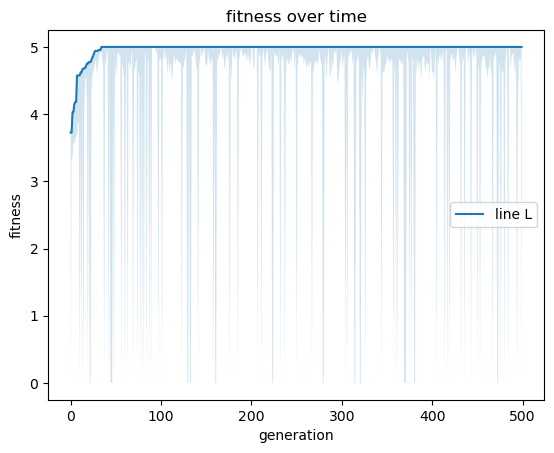

In [3738]:
import matplotlib.pyplot as plt

x  = range(500)
plt.plot(x, max_fitnesses, label="line L")
plt.fill_between(x, min_fitnesses, max_fitnesses, alpha=0.2)
plt.plot()

plt.xlabel("generation")
plt.ylabel("fitness")
plt.title("fitness over time")
plt.legend()
plt.show()

In [3739]:
len(population[0]['ingredients'])

7

In [3740]:
pprint.PrettyPrinter(indent=2, depth=4).pprint(population[0])

{ 'fitness': 5.0,
  'ingredients': [ { 'amount': 50,
                     'category': 'Powder',
                     'ingredient': 'cinnamon',
                     'rating': 5.0,
                     'unit': 'g'},
                   { 'amount': 109,
                     'category': 'Powder',
                     'ingredient': 'mocha/coffee',
                     'rating': 5.0,
                     'unit': 'g'},
                   { 'amount': 83,
                     'category': 'Pastes',
                     'ingredient': 'ice cream of choice',
                     'rating': 5.0,
                     'unit': 'g'},
                   { 'amount': 1,
                     'category': 'Butter',
                     'ingredient': 'unsalted butter',
                     'rating': 5.0,
                     'unit': 'g'},
                   { 'amount': 121,
                     'category': 'Liquids',
                     'ingredient': 'water',
                     'rating': 5.0,
                